In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('data.csv')
df

,n_semana,semana,visitas,offers,orders
0,1,7/4/2017,508013,51793,8629
1,2,14/4/2017,516606,50952,5608
2,3,21/4/2017,366509,50889,5235
3,4,28/4/2017,404754,51133,6063
4,5,5/5/2017,419576,51641,6323
5,6,12/5/2017,462115,52121,7753
6,7,19/5/2017,491091,59511,9008
7,8,26/5/2017,701321,68818,12336
8,9,2/6/2017,651450,69521,13553
9,10,9/6/2017,627048,68604,13175


In [3]:
df_transf = df.drop(['semana'],axis=1)

#novas colunas
df_transf['off_lag1'] = pd.Series([( df_transf['offers'][i-1] if i > 0 else 0 ) for i,x in enumerate(df_transf['offers'].values)], index=df_transf.index)
df_transf['vis_lag1'] = pd.Series([( df_transf['visitas'][i-1] if i > 0 else 0 ) for i,x in enumerate(df_transf['visitas'].values)], index=df_transf.index)
df_transf['off_lag2'] = pd.Series([( df_transf['offers'][i-2] if i > 1 else 0 ) for i,x in enumerate(df_transf['offers'].values)], index=df_transf.index)
df_transf['vis_lag2'] = pd.Series([( df_transf['visitas'][i-2] if i > 1 else 0 ) for i,x in enumerate(df_transf['visitas'].values)], index=df_transf.index)
#df_transf['off_diff'] = pd.Series([(df_transf['offers'][i-1] - df_transf['offers'][i-2] if i > 1 else 0 ) for i,x in enumerate(df_transf['offers'].values)], index=df_transf.index)
#df_transf['vis_diff'] = pd.Series([(df_transf['visitas'][i-1] - df_transf['visitas'][i-2] if i > 1 else 0 ) for i,x in enumerate(df_transf['visitas'].values)], index=df_transf.index)
df_transf['off_diff'] = df_transf['off_lag1'] - df_transf['off_lag2']
df_transf['vis_diff'] = df_transf['vis_lag1'] - df_transf['vis_lag2']
#min max scaler
#scaler = MinMaxScaler()
#df_transf[['n_semana','visitas','offers','off_lag1','vis_lag1','off_lag2','vis_lag2','off_diff','vis_diff']] = scaler.fit_transform(df_transf[['n_semana','visitas','offers','off_lag1','vis_lag1','off_lag2','vis_lag2','off_diff','vis_diff']])
df_transf

,n_semana,visitas,offers,orders,off_lag1,vis_lag1,off_lag2,vis_lag2,off_diff,vis_diff
0,1,508013,51793,8629,0,0,0,0,0,0
1,2,516606,50952,5608,51793,508013,0,0,51793,508013
2,3,366509,50889,5235,50952,516606,51793,508013,-841,8593
3,4,404754,51133,6063,50889,366509,50952,516606,-63,-150097
4,5,419576,51641,6323,51133,404754,50889,366509,244,38245
5,6,462115,52121,7753,51641,419576,51133,404754,508,14822
6,7,491091,59511,9008,52121,462115,51641,419576,480,42539
7,8,701321,68818,12336,59511,491091,52121,462115,7390,28976
8,9,651450,69521,13553,68818,701321,59511,491091,9307,210230
9,10,627048,68604,13175,69521,651450,68818,701321,703,-49871


In [4]:
X = df_transf[['n_semana','visitas','offers','off_lag1','vis_lag1','off_lag2','vis_lag2','off_diff','vis_diff']].values
y = np.ravel(df_transf[['orders']].values)

[0 1 2 3 4 5 6 7 8 9]


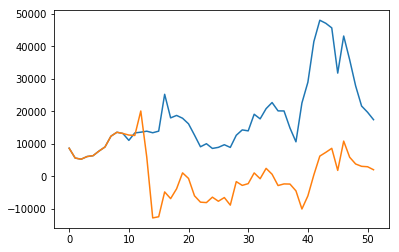

erro quadrado = -17.403238374178947
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


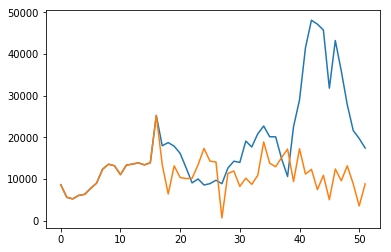

erro quadrado = -1.5543163111064133
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


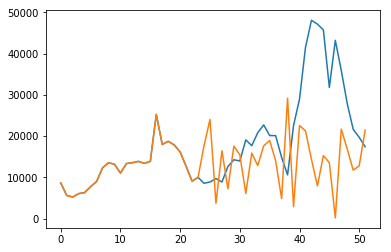

erro quadrado = -10.548789056327955
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30]


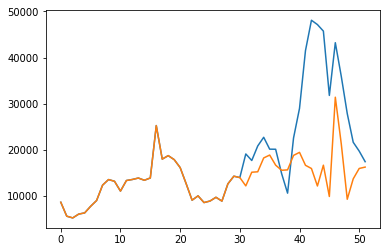

erro quadrado = -2.1719955836186253
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37]


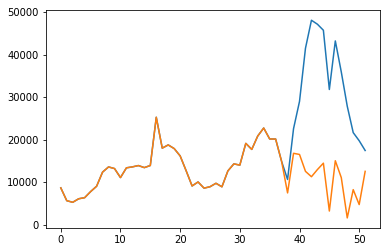

erro quadrado = -2.601079375642262
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44]


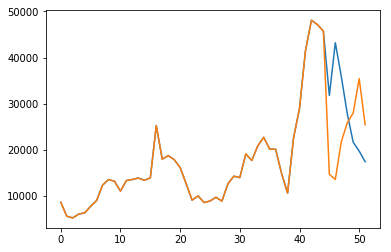

erro quadrado = -2.2651119870512155
erro quadrado medio:  -6.090755114654236



In [5]:
from sklearn.model_selection import TimeSeriesSplit
splits = 6
tscv = TimeSeriesSplit(n_splits=splits)

mlpr = MLPRegressor(solver='lbfgs', activation = 'relu', alpha=1e-5, hidden_layer_sizes=(100,100), max_iter = 10000)
soma = 0

for train_index, test_index in tscv.split(X):
    mlpr.fit(X[train_index], y[train_index])
    erro_quadrado = mlpr.score(X[test_index], y[test_index])
    soma +=erro_quadrado
    print(train_index)
    plt.figure()
    plt.plot(y)
    plt.plot(mlpr.predict(X))
    plt.show()
    print('erro quadrado =', erro_quadrado)
print ('erro quadrado medio: ',soma/splits)
print('')

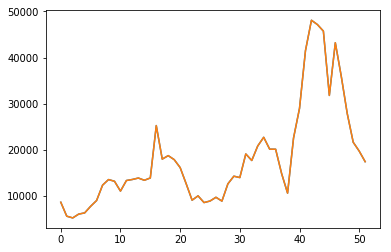

0.9999999999999977


In [6]:
mlpr = MLPRegressor(solver='lbfgs', activation = 'relu', alpha=1e-5, hidden_layer_sizes=(1000), max_iter = 10000)
mlpr.fit(X, y)
plt.figure()
plt.plot(y)
plt.plot(mlpr.predict(X))
plt.show()
print(mlpr.score(X,y))